In [1]:
import numpy as np
import numpy.linalg as la
float_formatter = lambda x: "%.3f" % x
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

## Матричные разложения

#### Ещё раз резюмируем действие SVD разложения:

![](svd.png)

### Пример компрессии с помощью SVD

In [2]:
# Reading the image
mat = plt.imread("./pictures/photo.png")

# SVD 
U, s, VT = la.svd(mat)
print(mat.shape)

(480, 423)


Размеры матрицы большие!

Посмотрим на сингулярные значения:

In [3]:
plt.plot(np.log(s))

$ \tilde{A} = U[:,:r] S[:r] V^{\top} [:r, :] $

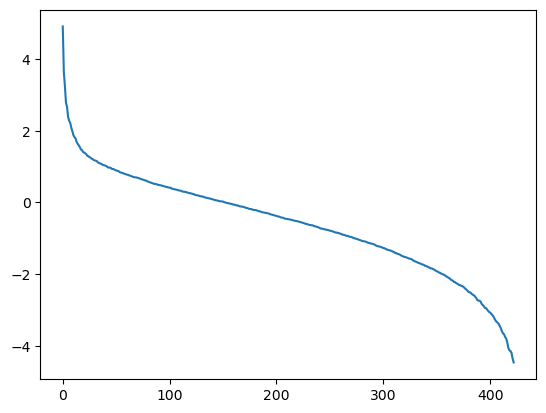

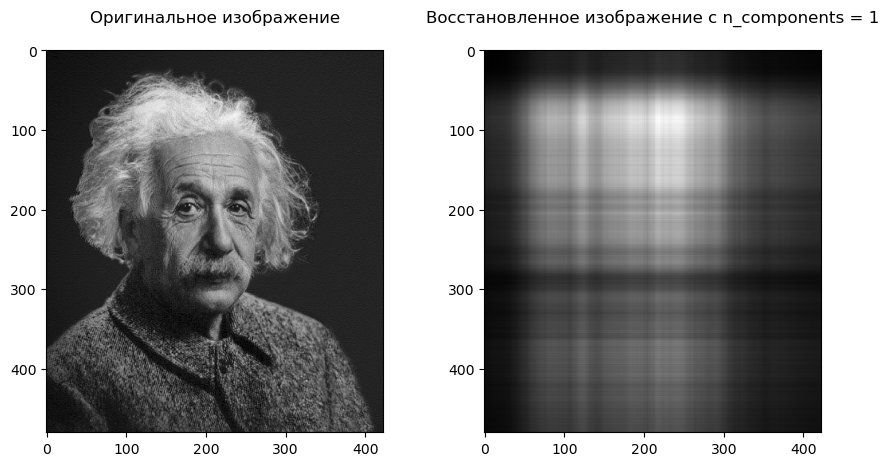

In [4]:
Sigma = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
r = 1
mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Оригинальное изображение", y=1.05)

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title(f'Восстановленное изображение с n_components = {r}', y=1.05)

plt.show()

## Анализ структуры изображения

In [5]:
# Reading the image
image = plt.imread("./pictures/shapes.png")

# SVD 
U, s, VT = la.svd(image)

In [6]:
s.shape

(492,)

In [7]:
plt.plot(np.log(s))

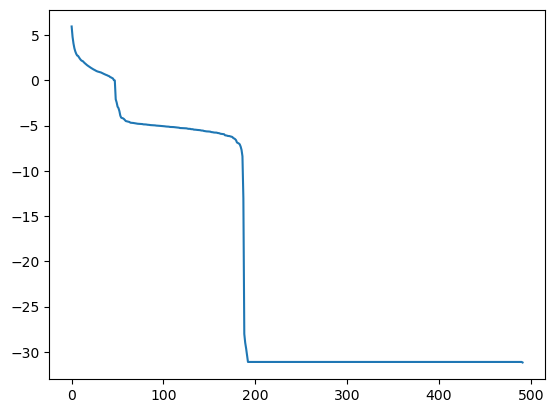

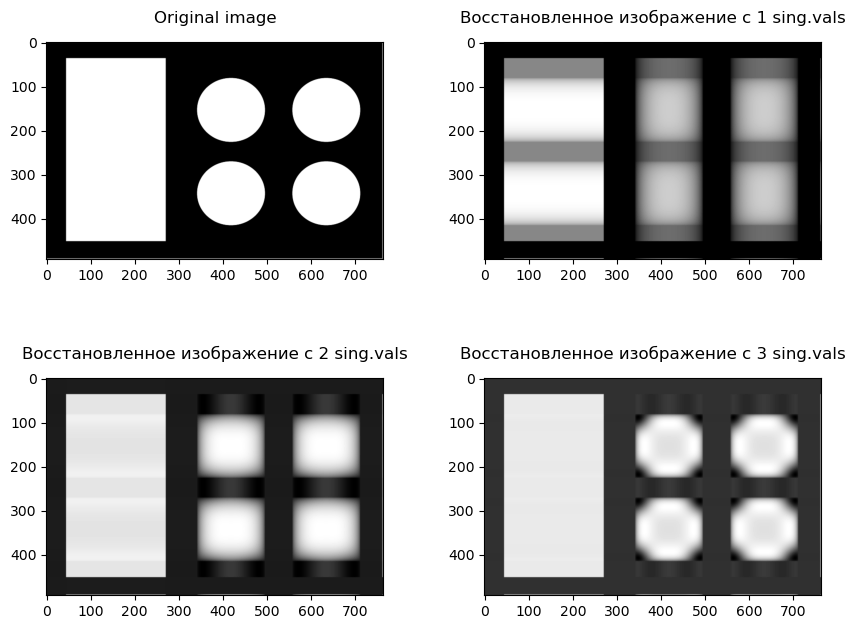

In [8]:
Sigma = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original image", y=1.05)

for i in range(1, 4):
    r = i
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap='gray')
    axes[i // 2, i % 2].set_title(f'Восстановленное изображение с {r} sing.vals', y=1.05)

plt.show()

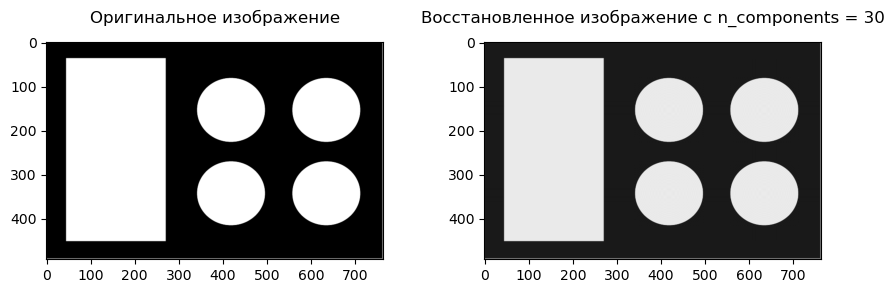

In [9]:
# Reconstruction of the matrix using the first 30 singular values
r = 30
mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(image, cmap='gray')
ax1.set_title("Оригинальное изображение", y=1.05)

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title(f'Восстановленное изображение с n_components = {r}', y=1.05)

plt.show()

### Слои:

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/tx/vd2j94pj633_8452zdk5jhp5bqdm_5/T/ipykernel_9719/2926252128.py:7: SyntaxWarning: invalid escape sequence '\s'
  axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)


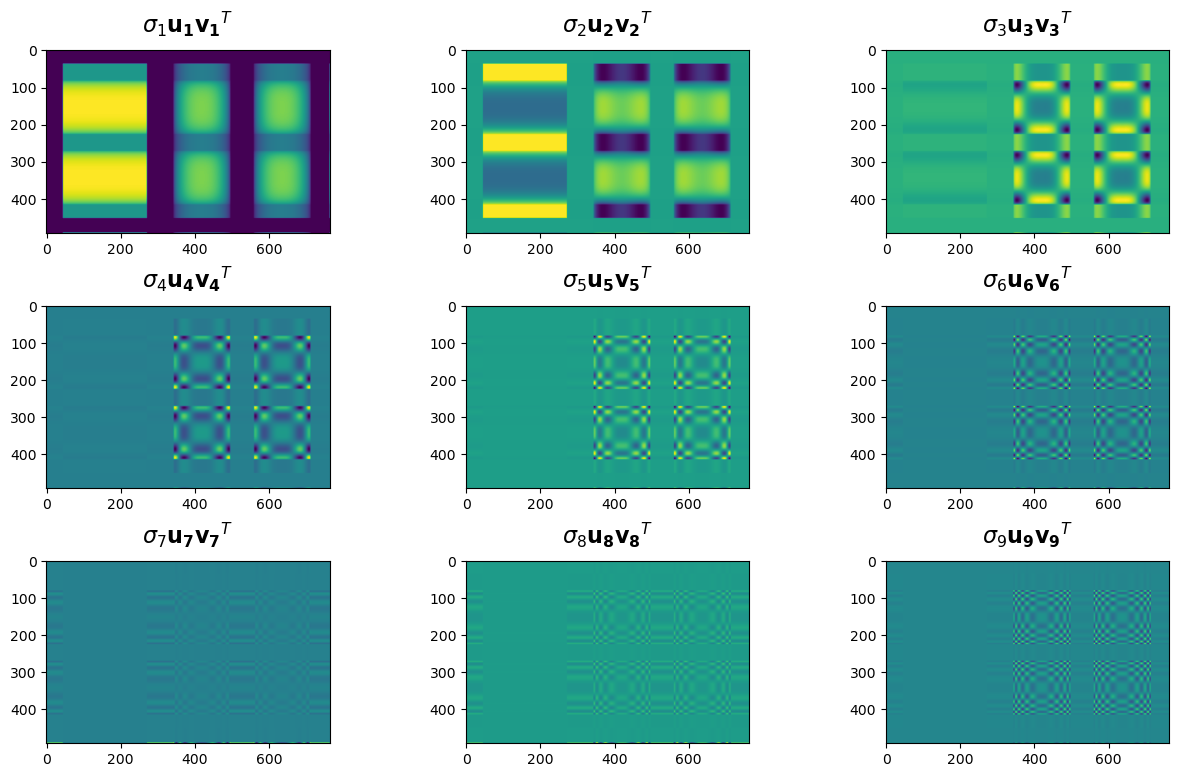

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15,9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(0, 9):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()

In [11]:
# Reading the image
mat = plt.imread("./pictures/monument.png")

# SVD 
U, s, VT = la.svd(mat)
Sigma = np.diag(s)
print(s.shape)

(426,)


In [12]:
plt.plot(np.log(s))

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/var/folders/tx/vd2j94pj633_8452zdk5jhp5bqdm_5/T/ipykernel_9719/726310066.py:17: SyntaxWarning: invalid escape sequence '\s'
  axes[1, i % 2].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
/var/folders/tx/vd2j94pj633_8452zdk5jhp5bqdm_5/T/ipykernel_9719/726310066.py:28: SyntaxWarning: invalid escape sequence '\s'
  axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)


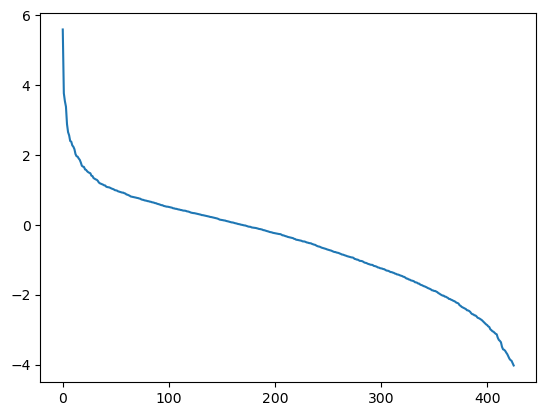

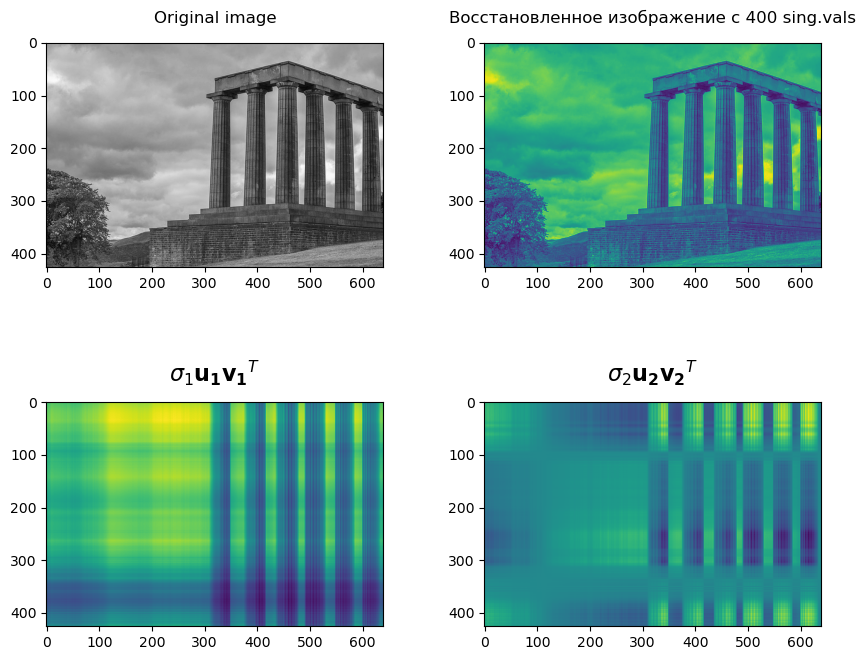

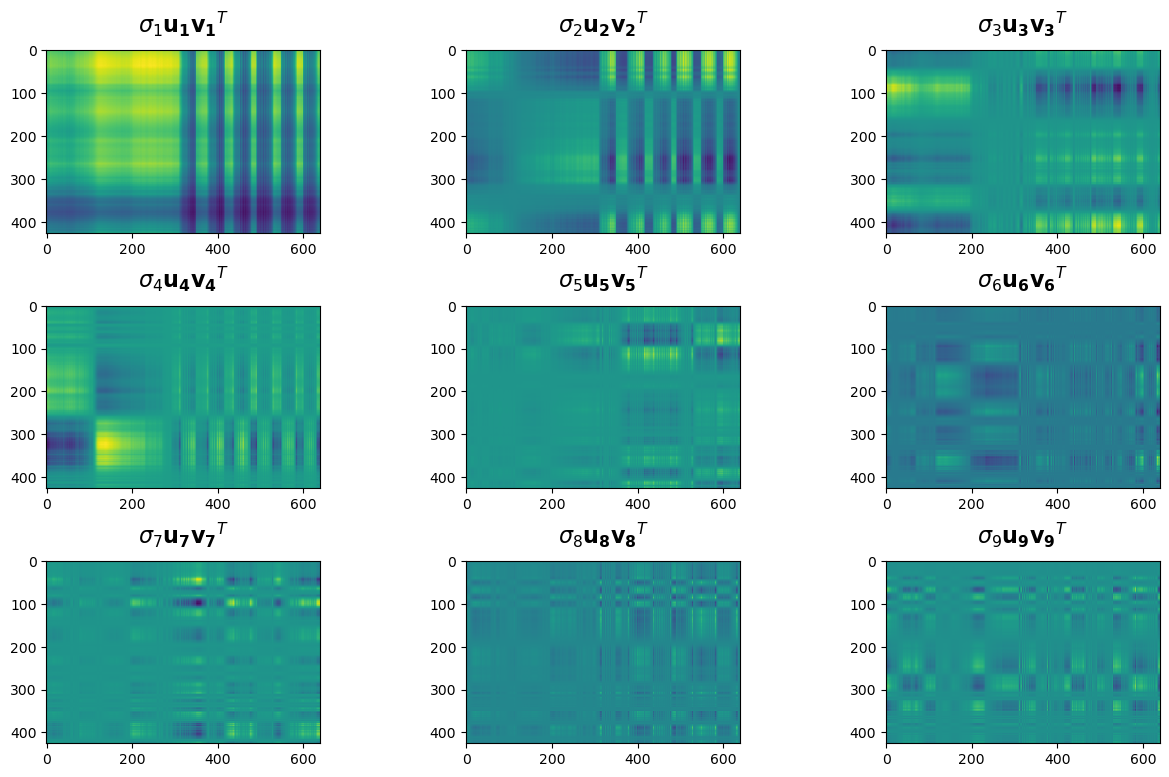

In [13]:
# Reconstruction of the matrix
r = 400
mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

axes[0,0].imshow(mat, cmap='gray')
axes[0,0].set_title("Original image", y=1.05)

axes[0,1].imshow(mat_approx)
axes[0,1].set_title(f'Восстановленное изображение с {r} sing.vals', y=1.05)

for i in range(0, 2):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[1, i % 2].imshow(mat_i)
    axes[1, i % 2].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()


fig, axes = plt.subplots(3, 3, figsize=(15,9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(0, 9):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()

In [14]:
# Reading the image
mat = plt.imread("./pictures/monument.png")

# SVD 
U, s, VT = la.svd(mat)
Sigma = np.diag(s)
print(s.shape)
# Reconstruction of the matrix
r = 20
s_min= 8
s_max = 400
mat_approx = U[:, s_min:s_max] @ Sigma[s_min:s_max, s_min:s_max] @ VT[s_min:s_max, :]

(426,)


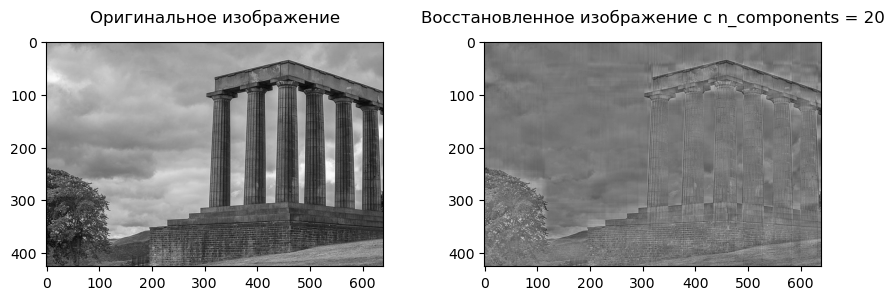

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Оригинальное изображение", y=1.05)

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title(f'Восстановленное изображение с n_components = {r}', y=1.05)

plt.show()

### Шумоподавление

In [16]:
# Reading the image
mat = plt.imread("./pictures/text.png")

# Добавление шума
noise = np.random.rand(mat.shape[0], mat.shape[1])
noizy_picture = np.copy(mat)

noizy_picture[noise > 0.96] = 0

In [17]:
plt.imshow(mat)

In [18]:
plt.imshow(noise)

In [19]:
plt.imshow(noizy_picture)

(250,)


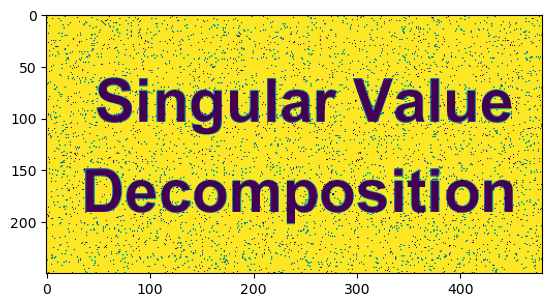

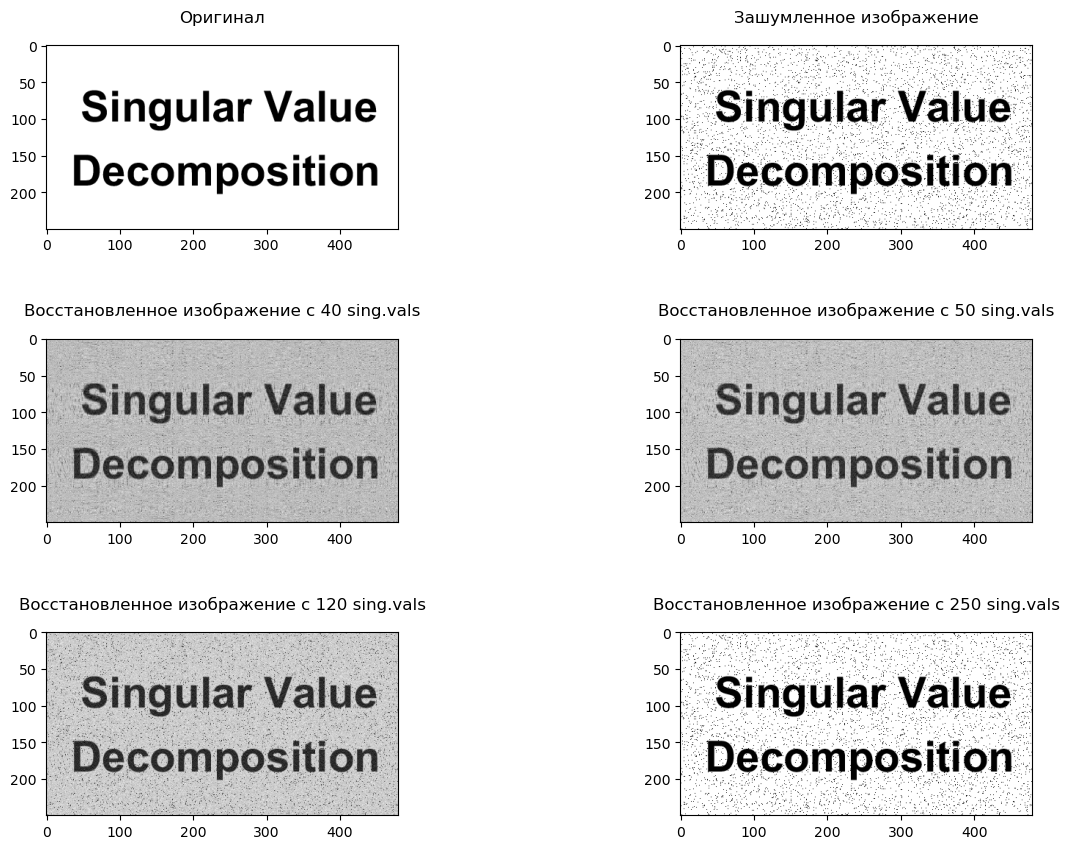

In [20]:
# SVD 
U, s, VT = la.svd(noizy_picture)
print(s.shape)
Sigma =  np.diag(s)

fig, axes = plt.subplots(3, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.6)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Оригинал", y=1.08)

axes[0, 1].imshow(noizy_picture, cmap='gray')
axes[0, 1].set_title("Зашумленное изображение", y=1.08)

r_list = [40, 50, 120, 250]
for i in range(2,6):
    r = r_list[i - 2]
    mat_rank_r = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]
    axes[i // 2, i % 2].imshow(mat_rank_r, cmap='gray')
    axes[i // 2, i % 2].set_title(f'Восстановленное изображение с {r} sing.vals', y=1.08)

plt.show()